In [1]:
#Universidade Federal de Pernambuco
#Disciplina: Macroeconomia 2
#Professor: Marcelo Silva
#Aluno: Paulo Francisco da Silva Junior

In [2]:
#Importações
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

Questão 2. [Mãos na massa I: aprendendo a fazer]. Obtenha no sítio do IPEADATA (www.ipeadata.gov.br) as séries trimestrais de: Índice encadeado dessazonalizado do PIB Real (preços de mercado), Índice encadeado dessazonalizado do consumo final das famílias, capital fixo - formação bruta (índice encadeado dessazonalizado). Além disto, obtenha as séries de horas trabalhadas na indústria (índice dessazonalizado), produtividade na indústria de transformação, e a série de índice do salário real na indústria em São Paulo (estas três últimas séries são mensais, então você precisa transformar para trimestral através de uma média aritmética simples). E responda as seguintes questões:

a) Obtenha o componente cíclico de todas as séries através de um filtro linear. Para isto, primeiro estime uma equação de regressão, usando qualquer software econométrico de sua preferência ou até mesmo o Excel, da forma: Yₜ = β0 + β1Tₜ onde Yₜ é a série como obtida no IPEADATA e Tₜ é uma variável de tendência. Dica: Se sua série começa no primeiro trimestre de 1980, então T1 = 1, e o segundo trimestre de 1980 receberá valor = 2, ou seja, T2 = 2, e assim por diante. O componente cíclico será então dado por: 

> Yc(t) = Yt − [β0c + β1c*Tt]

onde β0c e β1c são os coeficientes obtidos na estimação da regressão. [Isto é o mesmo que dizer que o componente cíclico é o termo de erro da regressão linear]. Depois de obter os valores de todas as séries, monte um gráfico para cada série. Além disto monte uma tabela com os resultados da regressão (no mínimo, apresente os coeficientes estimados e o R2 ajustado).

In [3]:
consumo = pd.read_excel("/content/Consumo.xls")
pib = pd.read_excel("/content/PIB_real.xls")
horas = pd.read_excel("/content/horas_trabalhadas_SP.xls")
investimento = pd.read_excel("/content/investimento.xls")
produtividade = pd.read_excel("/content/produtividade.xls")
salario = pd.read_excel("/content/salario_real.xls")

In [4]:
#Simplificando nomes
consumo.columns=["Data","consumo"]
pib.columns=["Data","pib"]
investimento.columns=["Data","investimento"]
horas.columns=["Data","horas"]
produtividade.columns=["Data","produtividade"]
salario.columns=["Data","salario"]

In [5]:
#Normalizando para iniciar em 1996
horas=horas.loc[horas["Data"]>=1996]
horas.reset_index(inplace=True,drop=True)

produtividade=produtividade.loc[produtividade["Data"]>=1996]
produtividade.reset_index(inplace=True,drop=True)

salario=salario.loc[salario["Data"]>=1996]
salario.reset_index(inplace=True,drop=True)

In [6]:
#Realizando agregação

horas["Data"]=horas["Data"].astype(str)
salario["Data"]=salario["Data"].astype(str)
produtividade["Data"]=produtividade["Data"].astype(str)

for i in range(0,len(horas["Data"]),1):
  horas["Data"][i]=horas["Data"][i].replace('.02','.01')
  horas["Data"][i]=horas["Data"][i].replace('.03','.01')
  horas["Data"][i]=horas["Data"][i].replace('.04','.02')
  horas["Data"][i]=horas["Data"][i].replace('.05','.02')
  horas["Data"][i]=horas["Data"][i].replace('.06','.02')
  horas["Data"][i]=horas["Data"][i].replace('.07','.03')
  horas["Data"][i]=horas["Data"][i].replace('.08','.03')
  horas["Data"][i]=horas["Data"][i].replace('.09','.03')
  horas["Data"][i]=horas["Data"][i].replace('.11','.04')
  horas["Data"][i]=horas["Data"][i].replace('.12','.04')
  horas["Data"][i]=horas["Data"][i].replace('.1','.04')

for i in range(0,len(salario["Data"]),1):
  salario["Data"][i]=salario["Data"][i].replace('.02','.01')
  salario["Data"][i]=salario["Data"][i].replace('.03','.01')
  salario["Data"][i]=salario["Data"][i].replace('.04','.02')
  salario["Data"][i]=salario["Data"][i].replace('.05','.02')
  salario["Data"][i]=salario["Data"][i].replace('.06','.02')
  salario["Data"][i]=salario["Data"][i].replace('.07','.03')
  salario["Data"][i]=salario["Data"][i].replace('.08','.03')
  salario["Data"][i]=salario["Data"][i].replace('.09','.03')
  salario["Data"][i]=salario["Data"][i].replace('.11','.04')
  salario["Data"][i]=salario["Data"][i].replace('.12','.04')
  salario["Data"][i]=salario["Data"][i].replace('.1','.04')

for i in range(0,len(produtividade["Data"]),1):
  produtividade["Data"][i]=produtividade["Data"][i].replace('.02','.01')
  produtividade["Data"][i]=produtividade["Data"][i].replace('.03','.01')
  produtividade["Data"][i]=produtividade["Data"][i].replace('.04','.02')
  produtividade["Data"][i]=produtividade["Data"][i].replace('.05','.02')
  produtividade["Data"][i]=produtividade["Data"][i].replace('.06','.02')
  produtividade["Data"][i]=produtividade["Data"][i].replace('.07','.03')
  produtividade["Data"][i]=produtividade["Data"][i].replace('.08','.03')
  produtividade["Data"][i]=produtividade["Data"][i].replace('.09','.03')
  produtividade["Data"][i]=produtividade["Data"][i].replace('.11','.04')
  produtividade["Data"][i]=produtividade["Data"][i].replace('.12','.04')
  produtividade["Data"][i]=produtividade["Data"][i].replace('.1','.04')

horas=pd.DataFrame(horas.groupby("Data")["horas"].mean())
horas.reset_index(inplace=True,drop=True)

salario=pd.DataFrame(salario.groupby("Data")["salario"].mean())
salario.reset_index(inplace=True,drop=True)

produtividade=pd.DataFrame(produtividade.groupby("Data")["produtividade"].mean())
produtividade.reset_index(inplace=True,drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dis

In [7]:
#Transformando index em trimestre, onde T = 1 = 1996T1
pib.index = pd.RangeIndex(start=1,stop=len(pib)+1,step=1)
consumo.index = pd.RangeIndex(start=1,stop=len(consumo)+1,step=1)
investimento.index = pd.RangeIndex(start=1,stop=len(investimento)+1,step=1)
horas.index = pd.RangeIndex(start=1,stop=len(horas)+1,step=1)
produtividade.index = pd.RangeIndex(start=1,stop=len(produtividade)+1,step=1)
salario.index = pd.RangeIndex(start=1,stop=len(salario)+1,step=1)

In [8]:
#Regressão PIB
B1C_pib, B0C_pib, r_value_pib, p_value_pib, std_err_pib = scipy.stats.linregress(pib.index,pib["pib"])

#Componente ciclico -  PIB
pib["ciclico"] = pib["pib"] - ( B0C_pib + B1C_pib*pib.index)

In [9]:
#Regressão consumo
B1C_c, B0C_c, r_value_c, p_value_c, std_err_c = scipy.stats.linregress(consumo.index, consumo["consumo"])

#Componente ciclico -  Consumo
consumo["ciclico"] = consumo["consumo"] - ( B0C_c + B1C_c*consumo.index)

In [10]:
#Regressão investimento
B1C_i, B0C_i, r_value_i, p_value_i, std_err_i = scipy.stats.linregress(investimento.index, investimento["investimento"])

#Componente ciclico -  Investimento
investimento["ciclico"] = investimento["investimento"] - ( B0C_i + B1C_i*investimento.index)

In [11]:
#Regressão horas
B1C_h, B0C_h, r_value_h, p_value_h, std_err_h = scipy.stats.linregress(horas.index, horas["horas"])

#Componente ciclico -  horas
horas["ciclico"] = horas["horas"] - ( B0C_h + B1C_h*horas.index)

In [12]:
#Regressão salario
B1C_s, B0C_s, r_value_s, p_value_s, std_err_s = scipy.stats.linregress(salario.index, salario["salario"])

#Componente ciclico -  salario
salario["ciclico"] = salario["salario"] - ( B0C_s + B1C_s*salario.index)

In [13]:
#Regressão produtividade
B1C_p, B0C_p, r_value_p, p_value_p, std_err_p = scipy.stats.linregress(produtividade.index, produtividade["produtividade"])

#Componente ciclico -  produtividade
produtividade["ciclico"] = produtividade["produtividade"] - ( B0C_i + B1C_i*produtividade.index)

In [20]:
#Inserindo dados numa tabela
tabela_dados = pd.DataFrame()
tabela_dados["B0"] = [ 
                      B0C_pib,
                      B0C_c,
                      B0C_i,
                      B0C_h,
                      B0C_p,
                      B0C_s 
                     ]

tabela_dados["B1"] = [ 
                      B1C_pib,
                      B1C_c,
                      B1C_i,
                      B1C_h,
                      B1C_p,
                      B1C_s 
                     ]

tabela_dados["R2"] = [ 
                      r_value_pib**2,
                      r_value_c**2,
                      r_value_i**2,
                      r_value_h**2,
                      r_value_p**2,
                      r_value_s**2 
                     ]

tabela_dados.index = ["PIB","Consumo", "Investimento", "Horas", "Produtividade", "Salario"]

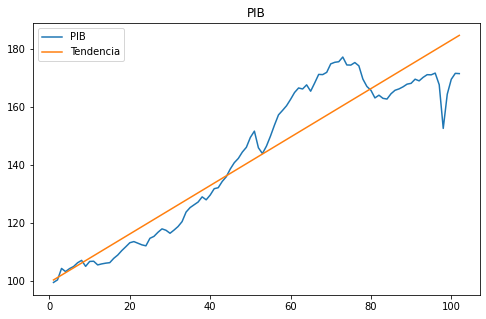

Trimestres; T = 1 = 1996 T1
f(T): 99.56988609380588 + 0.833334389541454 * T
R2: 0.8891568591031773


In [21]:
#Plotando gráfico - PIB
plt.figure(figsize=(8,5))
plt.plot(pib.index,pib["pib"], label="PIB")
plt.plot(pib.index,(B0C_pib + B1C_pib*pib.index), label="Tendencia")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("PIB")
plt.legend()
plt.show()

print("Trimestres; T = 1 = 1996 T1")
print("f(T): " + str(B0C_pib) + " + " + str(B1C_pib)+" * T")
print("R2: " + str(r_value_pib**2))

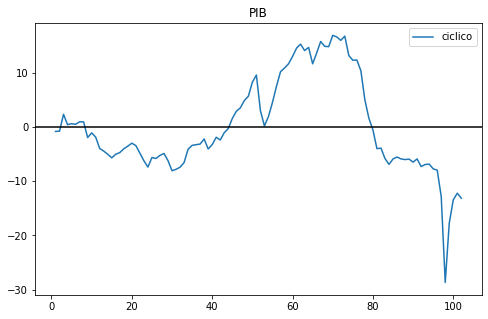

Trimestres; T = 1 = 1996 T1


In [22]:
#Plotando gráfico - PIB Ciclico
plt.figure(figsize=(8,5))
plt.plot(pib.index,pib["ciclico"],label="ciclico")
plt.axhline(0,color="0")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("PIB")
plt.legend()
plt.show()

print("Trimestres; T = 1 = 1996 T1")

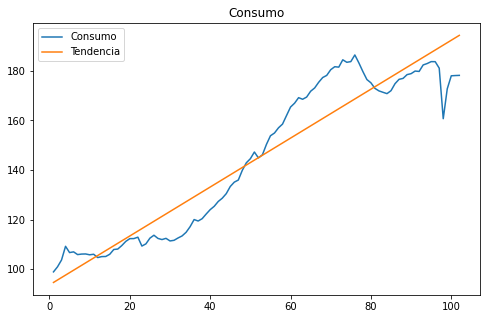

Trimestres; T = 1 = 1996 T1
f(T): 93.6177649160627 + 0.9871777420106165 * T
R2: 0.9000652648593462


In [23]:
#Plotando gráfico - consumo
plt.figure(figsize=(8,5))
plt.plot(consumo.index,consumo["consumo"], label="Consumo")
plt.plot(consumo.index,(B0C_c + B1C_c*consumo.index), label="Tendencia")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("Consumo")
plt.legend()
plt.show()

print("Trimestres; T = 1 = 1996 T1")
print("f(T): " + str(B0C_c) + " + " + str(B1C_c)+" * T")
print("R2: " + str(r_value_c**2))

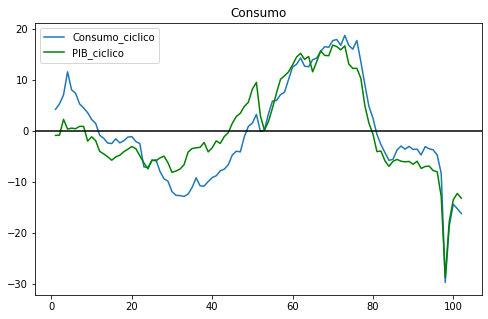

Trimestres; T = 1 = 1996 T1


In [24]:
#Plotando gráfico - Consumo Ciclico
plt.figure(figsize=(8,5))
plt.plot(consumo.index,consumo["ciclico"],label="Consumo_ciclico")
plt.plot(consumo.index,pib["ciclico"],label="PIB_ciclico",color="g")
plt.axhline(0,color="0")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("Consumo")
plt.legend()
plt.show()

print("Trimestres; T = 1 = 1996 T1")

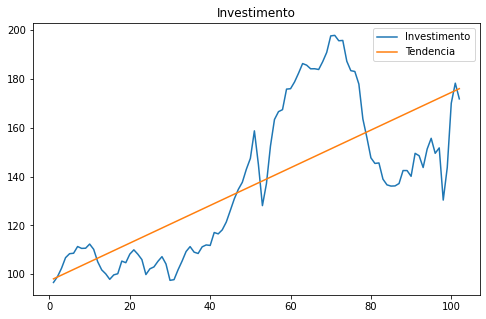

Trimestres; T = 1 = 1996 T1
f(T): 97.29040894811912 + 0.7716444709518133 * T
R2: 0.5329829681525771


In [25]:
#Plotando gráfico - investimento
plt.figure(figsize=(8,5))
plt.plot(investimento.index,investimento["investimento"], label="Investimento")
plt.plot(investimento.index,(B0C_i + B1C_i*investimento.index), label="Tendencia")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("Investimento")
plt.legend()
plt.show()

print("Trimestres; T = 1 = 1996 T1")
print("f(T): " + str(B0C_i) + " + " + str(B1C_i)+" * T")
print("R2: " + str(r_value_i**2))

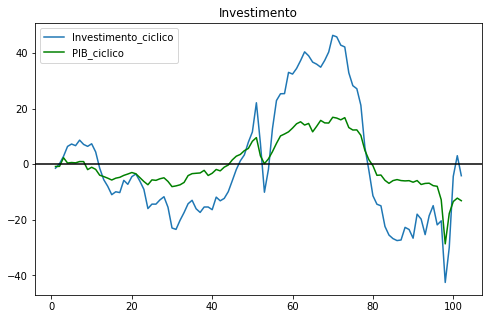

Trimestres; T = 1 = 1996 T1


In [26]:
#Plotando gráfico - Investimento Ciclico
plt.figure(figsize=(8,5))
plt.plot(investimento.index,investimento["ciclico"],label="Investimento_ciclico")
plt.plot(investimento.index,pib["ciclico"],label="PIB_ciclico",color="g")
plt.axhline(0,color="0")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("Investimento")
plt.legend()
plt.show()

print("Trimestres; T = 1 = 1996 T1")

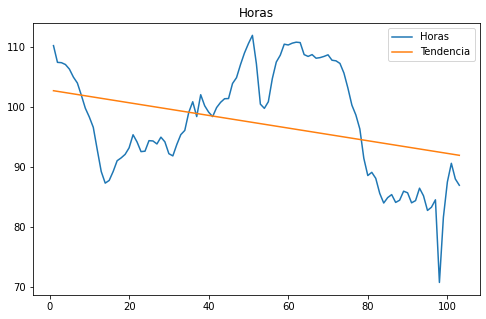

Trimestres; T = 1 = 1996 T1
f(T): 102.77114238694043-0.10523894477729863 * T
R2: 0.11676338063988562


In [27]:
#Plotando gráfico - horas
plt.figure(figsize=(8,5))
plt.plot(horas.index,horas["horas"], label="Horas")
plt.plot(horas.index,(B0C_h + B1C_h*horas.index), label="Tendencia")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("Horas")
plt.legend()
plt.show()

print("Trimestres; T = 1 = 1996 T1")
print("f(T): " + str(B0C_h) + str(B1C_h)+" * T")
print("R2: " + str(r_value_h**2))

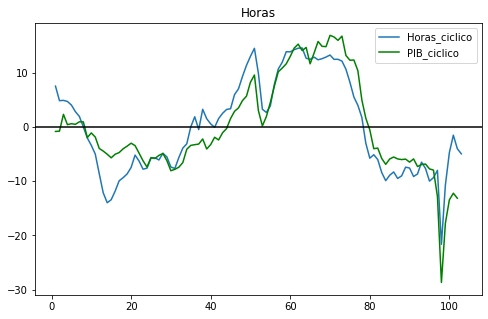

Trimestres; T = 1 = 1996 T1


In [28]:
#Plotando gráfico - Horas Ciclico
plt.figure(figsize=(8,5))
plt.plot(horas.index,horas["ciclico"],label="Horas_ciclico")
plt.plot(pib.index,pib["ciclico"],label="PIB_ciclico",color="g")
plt.axhline(0,color="0")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("Horas")
plt.legend()
plt.show()

print("Trimestres; T = 1 = 1996 T1")

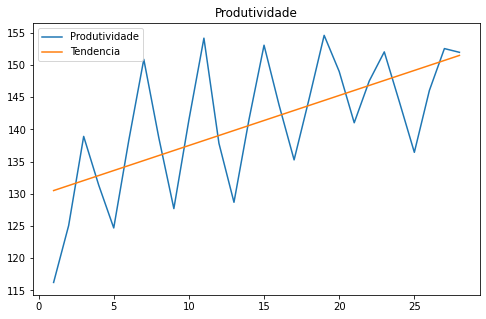

Trimestres; T = 1 = 1996 T1
f(T): 129.72934561094704 + 0.7768850532381455 * T
R2: 0.39733433777395905


In [29]:
#Plotando gráfico - produtividade
plt.figure(figsize=(8,5))
plt.plot(produtividade.index,produtividade["produtividade"], label="Produtividade")
plt.plot(produtividade.index,(B0C_p + B1C_p*produtividade.index), label="Tendencia")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("Produtividade")
plt.legend()
plt.show()

print("Trimestres; T = 1 = 1996 T1")
print("f(T): " + str(B0C_p) + " + " + str(B1C_p)+" * T")
print("R2: " + str(r_value_p**2))

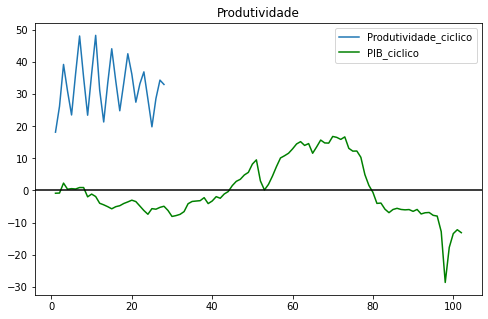

Trimestres; T = 1 = 1996 T1


In [30]:
#Plotando gráfico - Produtividade Ciclico
plt.figure(figsize=(8,5))
plt.plot(produtividade.index,produtividade["ciclico"],label="Produtividade_ciclico")
plt.plot(pib.index,pib["ciclico"],label="PIB_ciclico",color="g")
plt.axhline(0,color="0")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("Produtividade")
plt.legend()
plt.show()

print("Trimestres; T = 1 = 1996 T1")

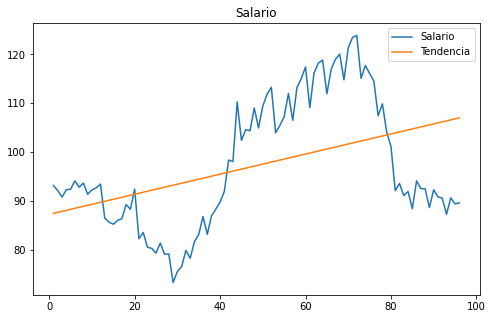

Trimestres; T = 1 = 1996 T1
f(T): 87.31679029070023 + 0.20521016964363814 * T
R2: 0.1863138998754262


In [31]:
#Plotando gráfico - salario
plt.figure(figsize=(8,5))
plt.plot(salario.index,salario["salario"], label="Salario")
plt.plot(salario.index,(B0C_s + B1C_s*salario.index), label="Tendencia")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("Salario")
plt.legend()
plt.show()

print("Trimestres; T = 1 = 1996 T1")
print("f(T): " + str(B0C_s) + " + " + str(B1C_s)+" * T")
print("R2: " + str(r_value_s**2))

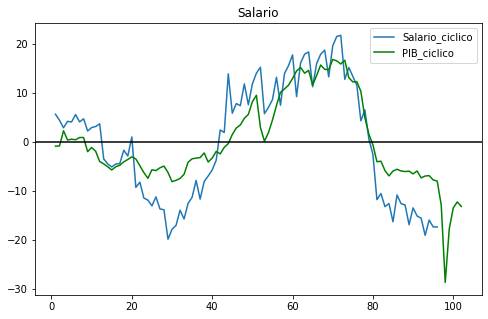

Trimestres; T = 1 = 1996 T1


In [32]:
#Plotando gráfico - Salario Ciclico
plt.figure(figsize=(8,5))
plt.plot(salario.index,salario["ciclico"],label="Salario_ciclico")
plt.plot(pib.index,pib["ciclico"],label="PIB_ciclico",color="g")
plt.axhline(0,color="0")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("Salario")
plt.legend()
plt.show()

print("Trimestres; T = 1 = 1996 T1")

In [33]:
tabela_dados

,B0,B1,R2
PIB,99.569886,0.833334,0.889157
Consumo,93.617765,0.987178,0.900065
Investimento,97.290409,0.771644,0.532983
Horas,102.771142,-0.105239,0.116763
Produtividade,129.729346,0.776885,0.397334
Salario,87.316790,0.205210,0.186314


b) Calcule o desvio padrão e a correlação dos componentes cíclicos das variáveis em relação ao componente cíclico do PIB. Apresente estes resultados em uma tabela e discuta os fatos estilizados.

In [34]:
#Inserindo desvio padrão relativo na tabela
tabela_dados["Rstd_ciclico(PIB)"] = [
                               pib["ciclico"].std()/pib["ciclico"].std(),
                               consumo["ciclico"].std()/pib["ciclico"].std(),
                               investimento["ciclico"].std()/pib["ciclico"].std(),
                               horas["ciclico"].std()/pib["ciclico"].std(),
                               produtividade["ciclico"].std()/pib["ciclico"].std(),
                               salario["ciclico"].std()/pib["ciclico"].std(),
                              ]

In [35]:
#Inserindo correlação com o pib na tabela
tabela_dados["Corr_ciclico(PIB)"] = [
                                     pib["ciclico"].corr(pib["ciclico"]),
                                     consumo["ciclico"].corr(pib["ciclico"]),
                                     investimento["ciclico"].corr(pib["ciclico"]),
                                     horas["ciclico"].corr(pib["ciclico"]),
                                     produtividade["ciclico"].corr(pib["ciclico"]),
                                     salario["ciclico"].corr(pib["ciclico"])
                                    ]

In [36]:
tabela_dados

,B0,B1,R2,Rstd_ciclico(PIB),Corr_ciclico(PIB)
PIB,99.569886,0.833334,0.889157,1.000000,1.000000
Consumo,93.617765,0.987178,0.900065,1.117975,0.903681
Investimento,97.290409,0.771644,0.532983,2.454949,0.920578
Horas,102.771142,-0.105239,0.116763,0.993330,0.892487
Produtividade,129.729346,0.776885,0.397334,0.904062,0.151528
Salario,87.316790,0.205210,0.186314,1.372218,0.903912


c) Discuta como um modelo de ciclos econômicos reais (RBC) movido por choques na PTF, como visto em sala de aula, poderia explicar os fatos estilizados observados na letra b.

d) Obtenha o Índice encadeado dessazonalizado do consumo da administração pública no sítio do IPEADATA. Utilizando os mesmos procedimentos da letra (a) obtenha o componente cíclico dos gastos governamentais e faça um gráfico de dispersão entre os desvios do PIB de sua tendência (obtido na letra a) e os desvios dos gastos governamentais em relação à sua tendência de longo prazo. Os gastos governamentais no Brasil aparentam ser procíclicos, contracíclicos ou acíclicos?

In [40]:
#Lendo e simplificando dados
consPublico = pd.read_excel("/content/consumo_publico.xls")
consPublico.columns = ["Data","cp"]

In [41]:
#Reorganizando index
consPublico.index = pd.RangeIndex(start=1,stop=len(consPublico)+1,step=1)

In [43]:
#Regressão consPublico
B1C_cp, B0C_cp, r_value_cp, p_value_cp, std_err_cp = scipy.stats.linregress(consPublico.index,consPublico["cp"])

#Componente ciclico -  consPublico
consPublico["ciclico"] = consPublico["cp"] - ( B0C_cp + B1C_cp*consPublico.index)

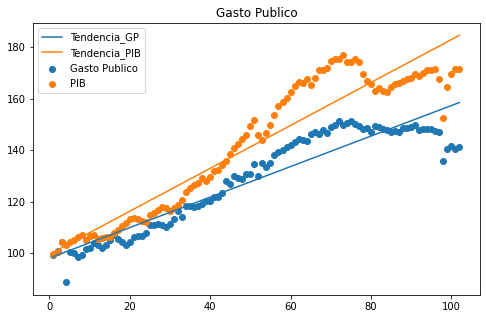

Trimestres; T = 1 = 1996 T1
f(T): 87.31679029070023 + 0.20521016964363814 * T
R2: 0.1863138998754262


In [51]:
#Plotando gráfico - consPublico
plt.figure(figsize=(8,5))
plt.scatter(consPublico.index,consPublico["cp"], label="Gasto Publico")
plt.plot(consPublico.index,(B0C_cp + B1C_cp*consPublico.index), label="Tendencia_GP")
plt.scatter(pib.index,pib["pib"], label="PIB")
plt.plot(pib.index,(B0C_pib + B1C_pib*pib.index), label="Tendencia_PIB")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("Gasto Publico")
plt.legend()
plt.show()

print("Trimestres; T = 1 = 1996 T1")
print("f(T): " + str(B0C_s) + " + " + str(B1C_s)+" * T")
print("R2: " + str(r_value_s**2))

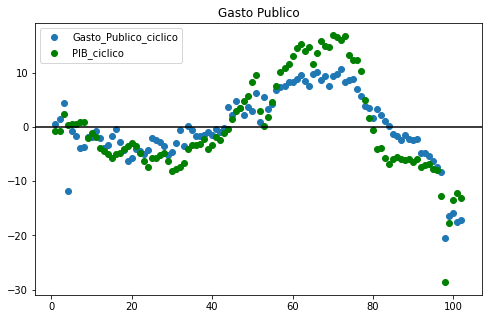

Trimestres; T = 1 = 1996 T1


In [47]:
#Plotando gráfico - consPublico Ciclico
plt.figure(figsize=(8,5))
plt.scatter(consPublico.index,consPublico["ciclico"],label="Gasto_Publico_ciclico")
plt.scatter(pib.index,pib["ciclico"],label="PIB_ciclico",color="g")
plt.axhline(0,color="0")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("Gasto Publico")
plt.legend()
plt.show()

print("Trimestres; T = 1 = 1996 T1")

O gasto do governo Brasileiro parece ser prociclico em relação ao PIB